# 2. Dataset Selection and Data Extraction 

In [11]:
import pandas as pd

data = pd.read_csv('HRDataSets.csv')

print("Dataset Info:")
data.info()

print("\n Dataset shape:", data.shape)

print("\n Value counts of Attrition:")
print(data['Attrition'].value_counts())

print("\n First 5 rows of the dataset:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11906 entries, 0 to 11905
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               11906 non-null  int64 
 1   Age                       11906 non-null  int64 
 2   Gender                    11906 non-null  object
 3   Years at Company          11906 non-null  int64 
 4   Job Role                  11906 non-null  object
 5   Monthly Income            11906 non-null  int64 
 6   Work-Life Balance         11906 non-null  object
 7   Job Satisfaction          11906 non-null  object
 8   Performance Rating        11906 non-null  object
 9   Number of Promotions      11906 non-null  int64 
 10  Overtime                  11906 non-null  object
 11  Distance from Home        11906 non-null  int64 
 12  Education Level           11906 non-null  object
 13  Marital Status            11906 non-null  object
 14  Company 

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Marital Status,Company Tenure,Number of Dependents,Job Level,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,30585,35,Male,7,Education,4563,Good,High,Average,1,...,Single,27,4,Entry,No,No,No,Good,High,Left
1,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,Divorced,76,2,Senior,No,No,Yes,Good,Low,Stayed
2,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,Single,96,4,Entry,No,No,No,Poor,Low,Left
3,46775,22,Female,5,Healthcare,8700,Good,High,Average,0,...,Married,48,0,Mid,No,No,No,Poor,High,Stayed
4,65181,55,Female,16,Media,5939,Poor,High,Average,0,...,Divorced,46,1,Entry,No,No,No,Good,High,Stayed


# 3. Data Cleaning and Preprocessing 

In [13]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


In [15]:
data.describe().round(0).astype(int)

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents
count,11906,11906,11906,11906,11906,11906,11906
mean,37151,38,16,7298,1,50,2
std,21479,12,11,2154,1,29,2
min,5,18,1,1226,0,1,0
25%,18580,28,7,5645,0,25,0
50%,37005,38,13,7346,1,50,1
75%,55732,49,22,8862,2,75,3
max,74465,59,51,15063,4,99,6


In [17]:
print("\nData types of each column:")
data.dtypes


Data types of each column:


Employee ID                  int64
Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level                   object
Remote Work                 object
Leadership Opportunities    object
Innovation Opportunities    object
Company Reputation          object
Employee Recognition        object
Attrition                   object
dtype: object

In [12]:
if 'Company Tenure' in data.columns:
    data = data.drop('Company Tenure', axis=1)
    print("\n'Company Tenure' column removed.")
else:
    print("\n'Company Tenure' column not found.")


'Company Tenure' column removed.


# 4. Exploratory Data Analytics (EDA)

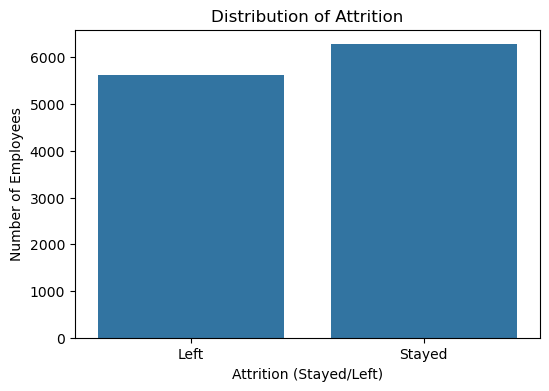

In [19]:
import matplotlib.pyplot as mp
import seaborn as sb

mp.figure(figsize=(6, 4))
sb.countplot(data=data, x='Attrition')
mp.title('Distribution of Attrition')
mp.xlabel('Attrition (Stayed/Left)')
mp.ylabel('Number of Employees')
mp.show()

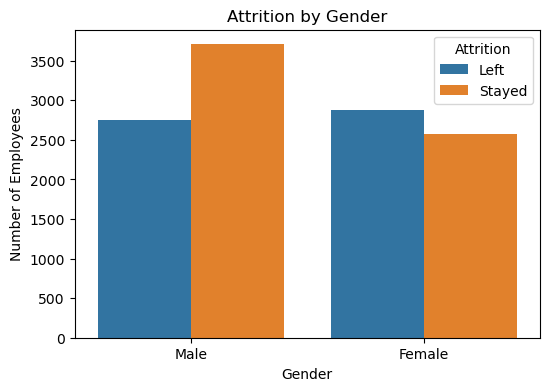

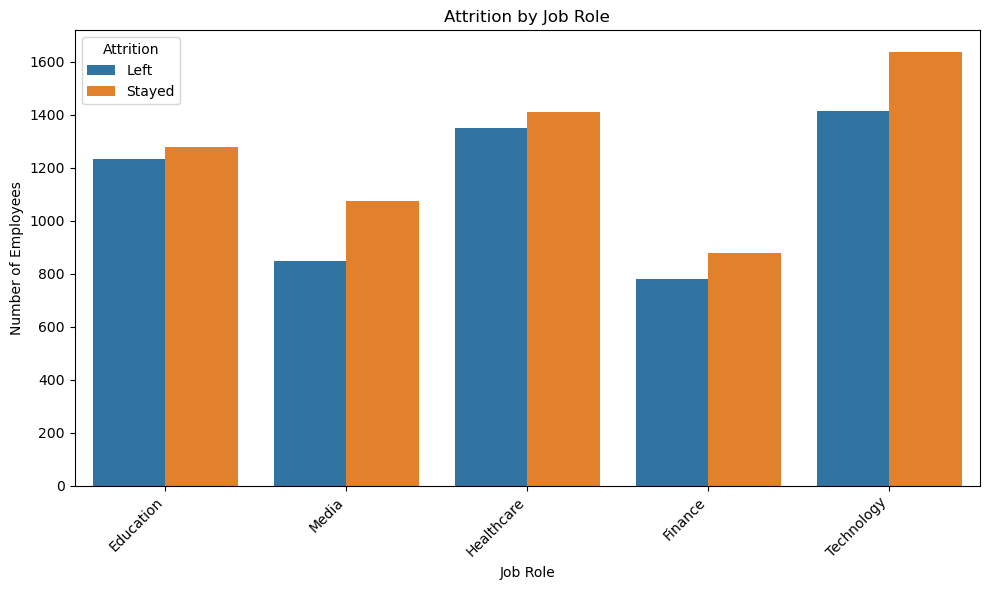

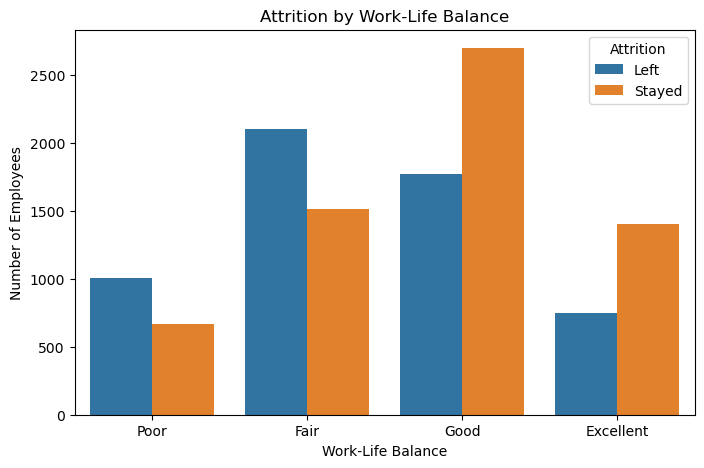

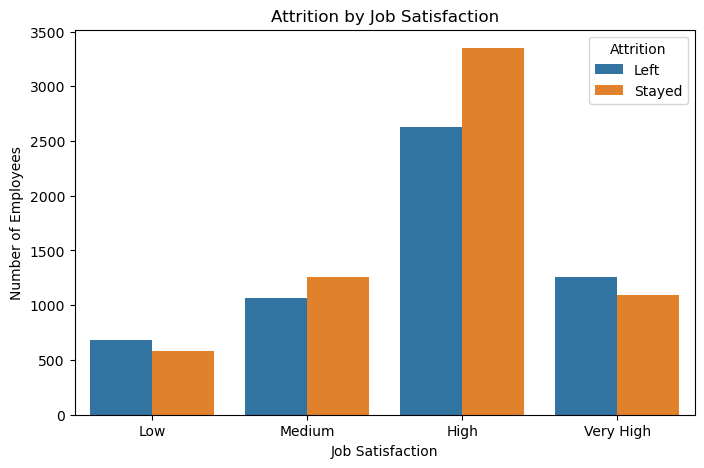

In [20]:
# Attrition by Gender
mp.figure(figsize=(6, 4))
sb.countplot(data=data, x='Gender', hue='Attrition')
mp.title('Attrition by Gender')
mp.xlabel('Gender')
mp.ylabel('Number of Employees')
mp.show()

# Attrition by Job Role
mp.figure(figsize=(10, 6))
sb.countplot(data=data, x='Job Role', hue='Attrition')
mp.title('Attrition by Job Role')
mp.xlabel('Job Role')
mp.ylabel('Number of Employees')
mp.xticks(rotation=45, ha='right')
mp.tight_layout()
mp.show()

# Attrition by Work-Life Balance
mp.figure(figsize=(8, 5))
sb.countplot(data=data, x='Work-Life Balance', hue='Attrition', order=['Poor', 'Fair', 'Good', 'Excellent'])
mp.title('Attrition by Work-Life Balance')
mp.xlabel('Work-Life Balance')
mp.ylabel('Number of Employees')
mp.show()

# Attrition by Job Satisfaction
mp.figure(figsize=(8, 5))
sb.countplot(data=data, x='Job Satisfaction', hue='Attrition', order=['Low', 'Medium', 'High', 'Very High'])
mp.title('Attrition by Job Satisfaction')
mp.xlabel('Job Satisfaction')
mp.ylabel('Number of Employees')
mp.show()

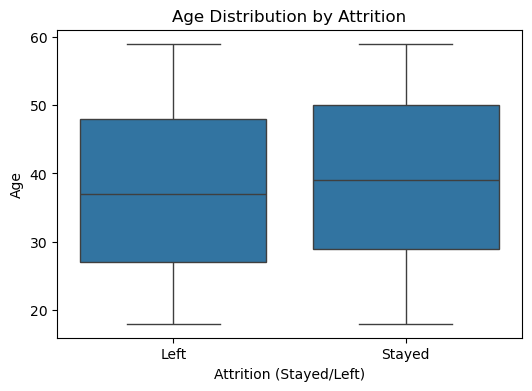

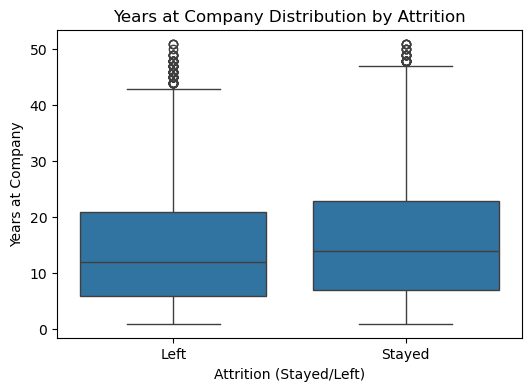

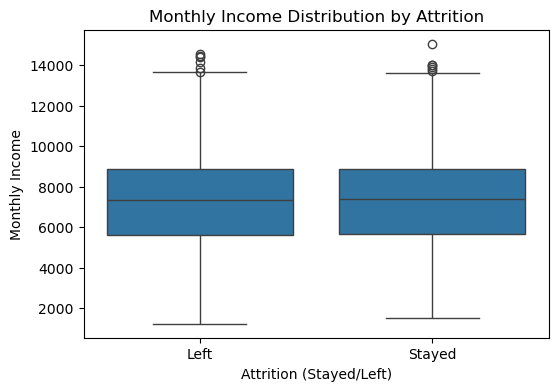

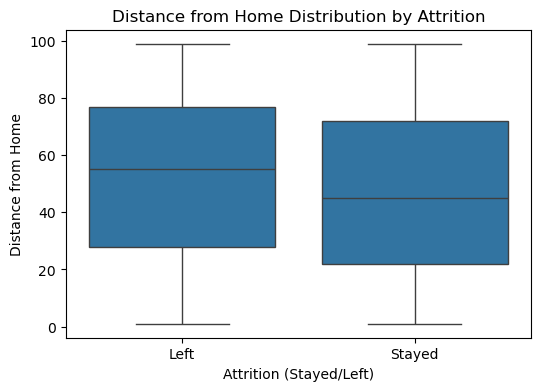

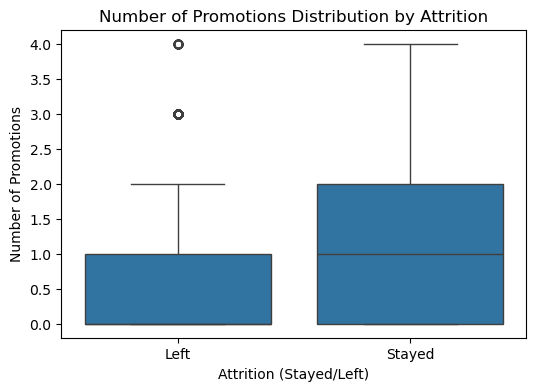

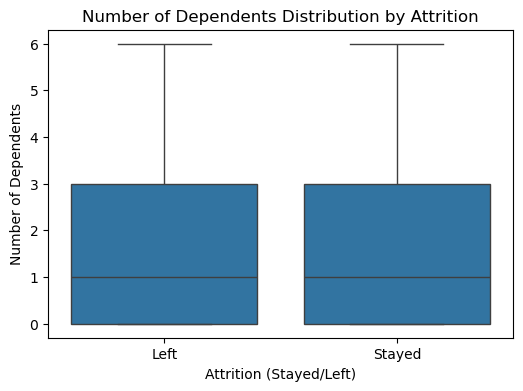

In [42]:
numerical_columns = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 'Number of Promotions', 'Number of Dependents']
for col in numerical_columns:
    mp.figure(figsize=(4, ))
    sb.boxplot(data=data, x='Attrition', y=col)
    mp.title(f'{col} Distribution by Attrition')
    mp.xlabel('Attrition (Stayed/Left)')
    mp.ylabel(col)
    mp.show()

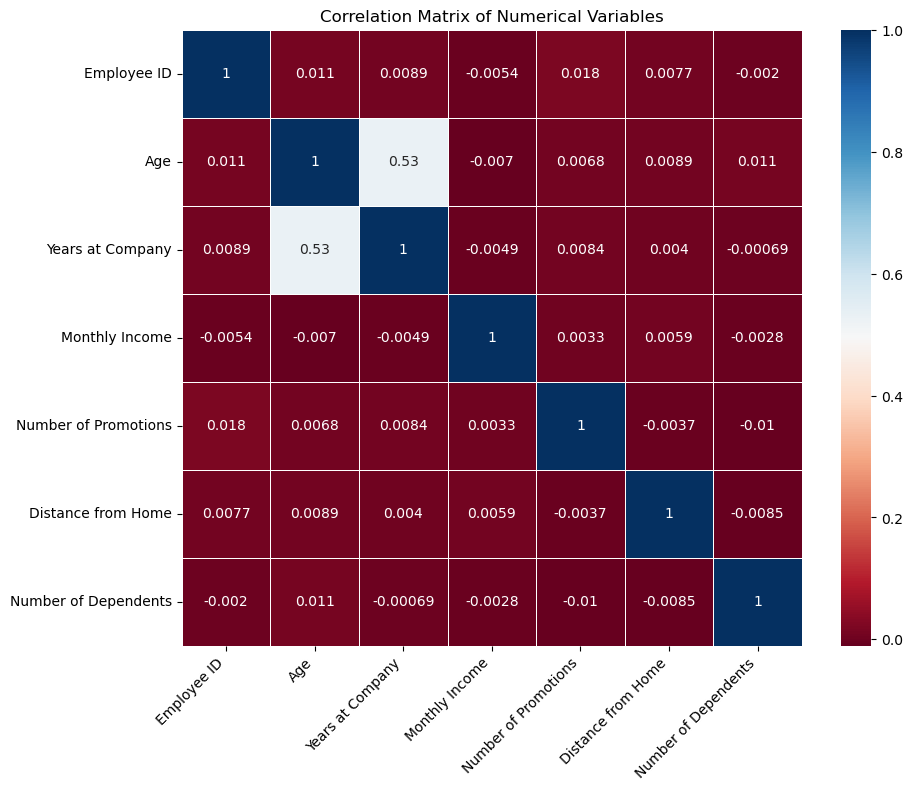

In [51]:
numerical_data = data.select_dtypes(include=['number'])
cor_matrix = numerical_data.corr()
mp.figure(figsize=(10, 8))
sb.heatmap(cor_matrix, annot=True, cmap='RdBu', linewidths=0.5)
mp.title('Correlation Matrix of Numerical Variables')
mp.xticks(rotation = 45, ha='right')
mp.show()

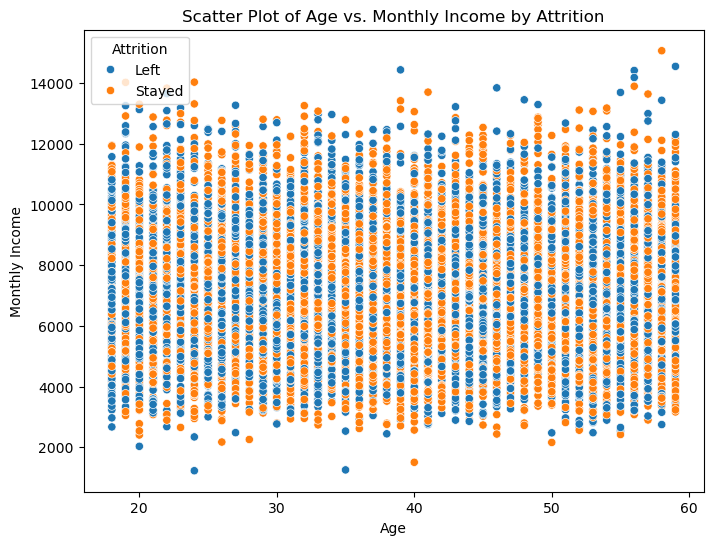

In [52]:
mp.figure(figsize=(8, 6))
sb.scatterplot(data=data, x='Age', y='Monthly Income', hue='Attrition')
mp.title('Scatter Plot of Age vs. Monthly Income by Attrition')
mp.xlabel('Age')
mp.ylabel('Monthly Income')
mp.show()

# Project Implementation (Analytical Techniques and Methods - Implementation Focus)

# Feature Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

X = data.drop(['Employee ID', 'Attrition'], axis=1)
y = data['Attrition']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

X = pd.get_dummies(X, drop_first=True)
print("\nFeatures (X) after one-hot encoding (first 5 rows):")
X.head()


Features (X) after one-hot encoding (first 5 rows):


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Job Level_Senior,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,35,7,4563,1,55,4,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,50,7,5583,3,14,2,True,False,False,False,...,True,False,False,True,False,True,False,True,False,False
2,58,44,5525,0,43,4,True,False,False,True,...,False,False,False,False,False,False,True,True,False,False
3,22,5,8700,0,2,0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,55,16,5939,0,31,1,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


# Data Splitting

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (9524, 38)
Shape of X_test: (2382, 38)
Shape of y_train: (9524,)
Shape of y_test: (2382,)


# Logistic Regression Implementation

In [68]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(random_state=42, solver='liblinear')
lm.fit(X_train, y_train)
y_pred_logistic = lm.predict(X_test)
print("\nLogistic Regression Model Trained.")


Logistic Regression Model Trained.


Logistic Regression Performance:
Accuracy: 0.7443
Precision (Predicting 'Left'): 0.7483
Recall (Identifying 'Left'): 0.7763
F1-Score: 0.7620
AUC-ROC: 0.8291


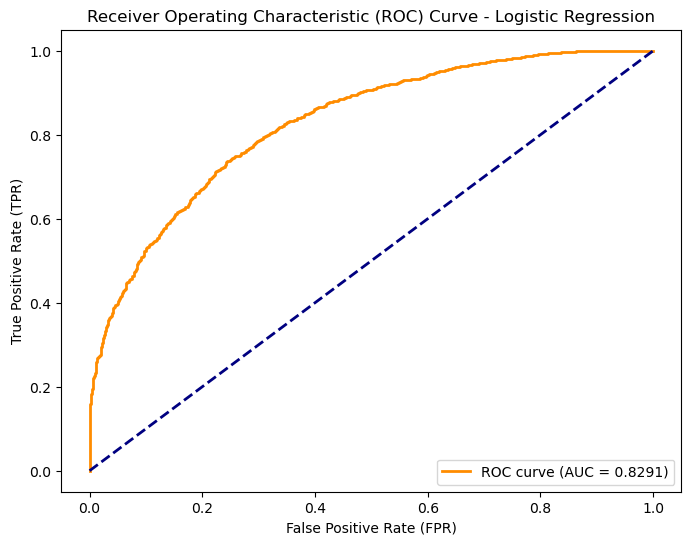

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, lm.predict_proba(X_test)[:, 1])

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Predicting 'Left'): {precision:.4f}")
print(f"Recall (Identifying 'Left'): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Random Forest Implementation

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(random_state=42)
rfm.fit(X_train, y_train)
y_pred_rf = rfm.predict(X_test)
print("\nRandom Forest Model Trained.")


Random Forest Model Trained.


Random Forest Performance:
Accuracy: 0.7326
Precision (Predicting 'Left'): 0.7405
Recall (Identifying 'Left'): 0.7588
F1-Score: 0.7495
AUC-ROC: 0.8095


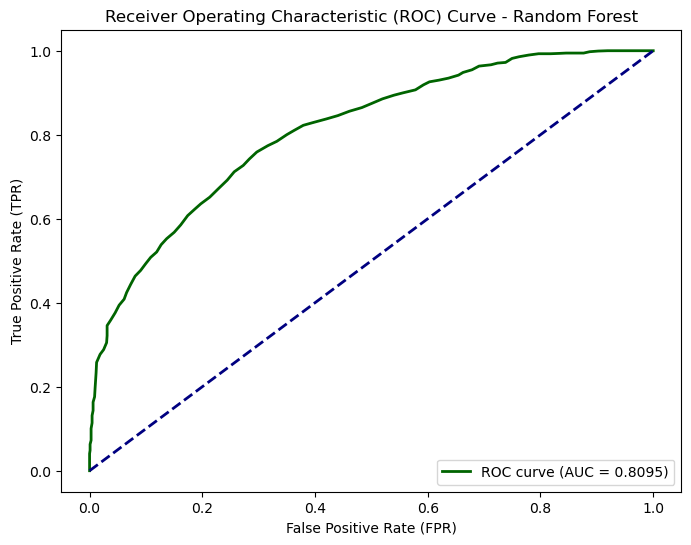

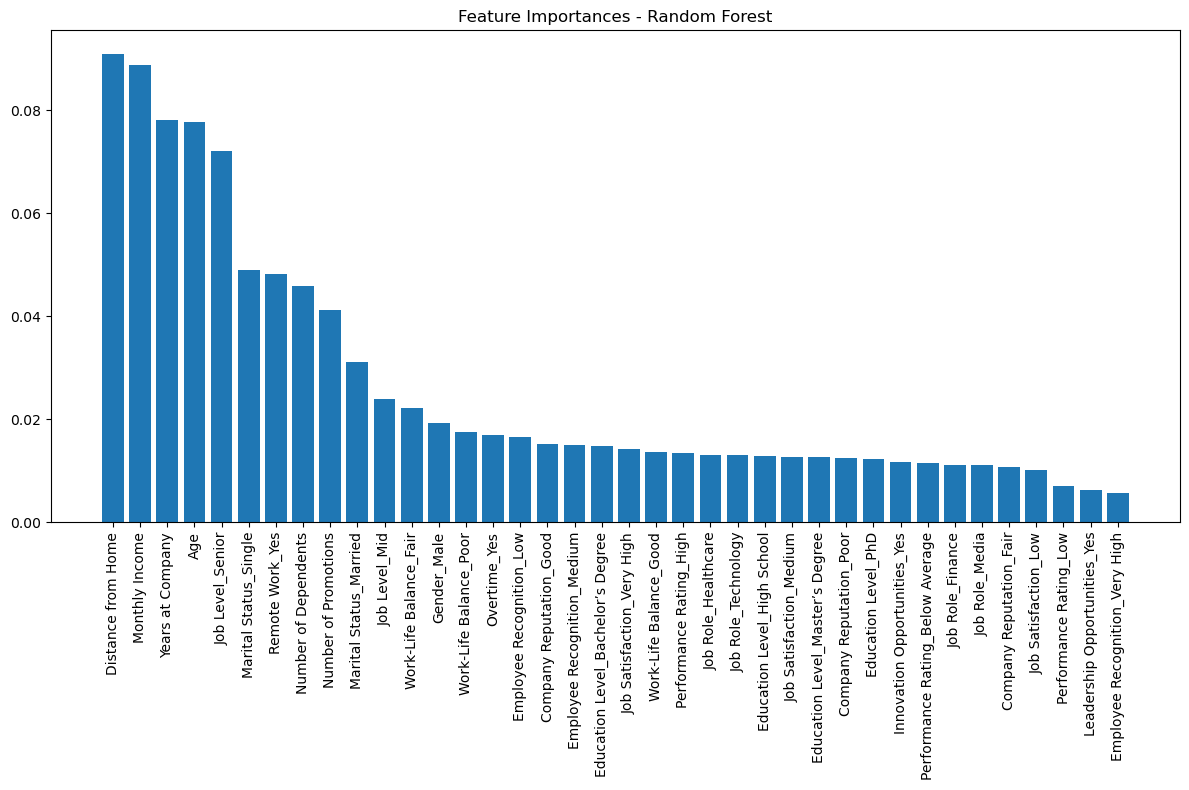

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rfm.predict_proba(X_test)[:, 1])

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision (Predicting 'Left'): {precision_rf:.4f}")
print(f"Recall (Identifying 'Left'): {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfm.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


importances =rfm.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation = 'vertical')
plt.tight_layout()
plt.show()

### Data Analytics Artefact (Implemented Model)

In [62]:
import joblib
joblib.dump(lm, 'attrition_model.pkl')
print("Logistic Regression model is saved to attrition_model.pkl")

Logistic Regression model is saved to attrition_model.pkl


In [64]:
joblib.dump(rfm, 'attrition_model_rf.pkl')
print("Random Forest model is saved to attrition_model_rf.pkl")

Random Forest model is saved to attrition_model_rf.pkl
